<h2>Music014/102 Lab2: Tonality and Rhythm</h2>
<h2>Prof. Michael Casey</h2>
<h2>Dartmouth College</h2>

In [1]:
# import libraries that we will use
from pylab import * 
from bregman.suite import *
import tonality as ton # The Well-Tempered Clavier Tools
import mayavi.mlab as mylab
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:131: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


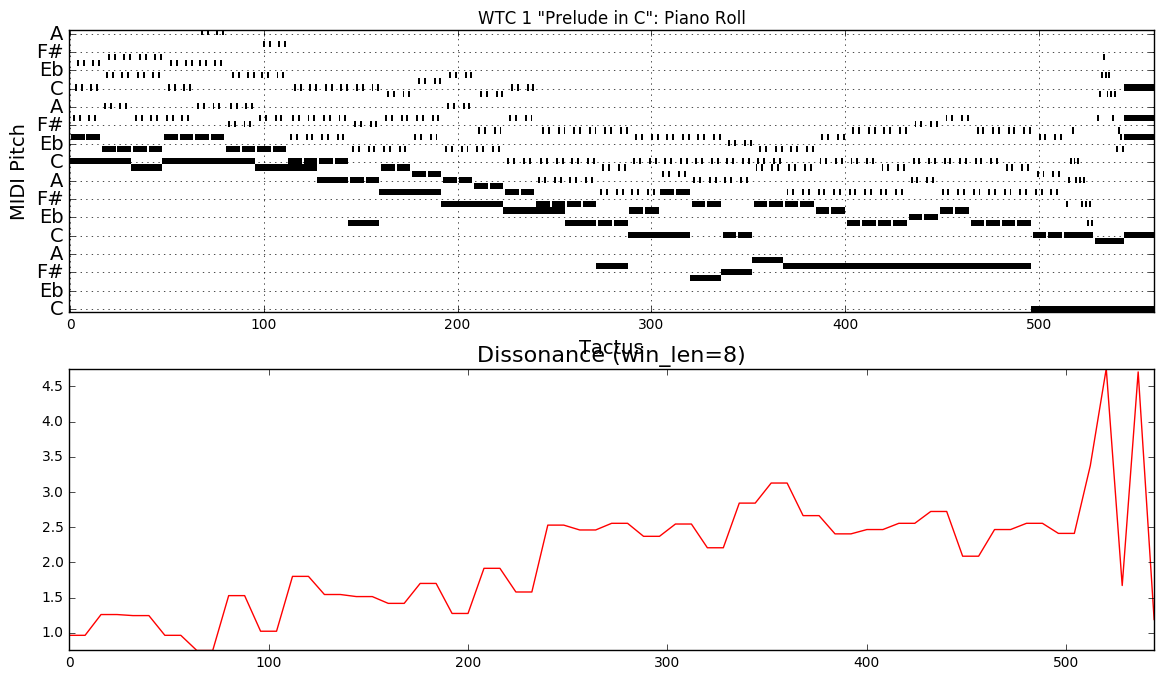

In [2]:
execfile('tonality.py')

In [3]:
reload(ton)

<module 'tonality' from 'tonality.pyc'>

In [4]:
help(ton)

Help on module tonality:

NAME
    tonality - tonality.py - Matrix representations of musical scores, corpara, and their tonality

FILE
    /home/mkc/exp/music21/WTC_ASCII/tonality.py

DESCRIPTION
    Example: J. S. Bach's "Well Tempered Clavier" Books 1 and 2
    
    2015, Michael A. Casey, Dartmouth College, Bregman Media Labs
    
    License: 
    Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
    http://creativecommons.org/licenses/by-nc/4.0/

FUNCTIONS
    center_mtx(D)
        Given a dissimilarity or dissonance matrix, center the matrix by subtracting the mean of 
        the rows and columns. For a dissimilarity matrix this operation yields the "scatter matrix".
    
    dissimilarity_mtx(A)
        Given a piano-roll indicator matrix, construct self-dissimilarity matrix
    
    dissonance_fun(A)
        Given a piano-roll indicator matrix representation of a musical work (128 pitches x beats),
        return the dissonance as a function of beats

<h4>In this lab you will:</h4>
    1. Analyze music using both audio features and symbolic (score-based) features
    2. Analyze a musical corpus by sampling from multiple works
    3. Extract the latent geometry in tonal music 

<h1>Part A</h1>
<h4>First, let's load a single piece of music: the Prelude in C Major from J. S. Bach's Well Tempered Clavier Book 1</h4>

In [5]:
prelude1 = loadtxt('01.ascii') # Load the score in matrix form, 128 MIDI notes x time (tactus)

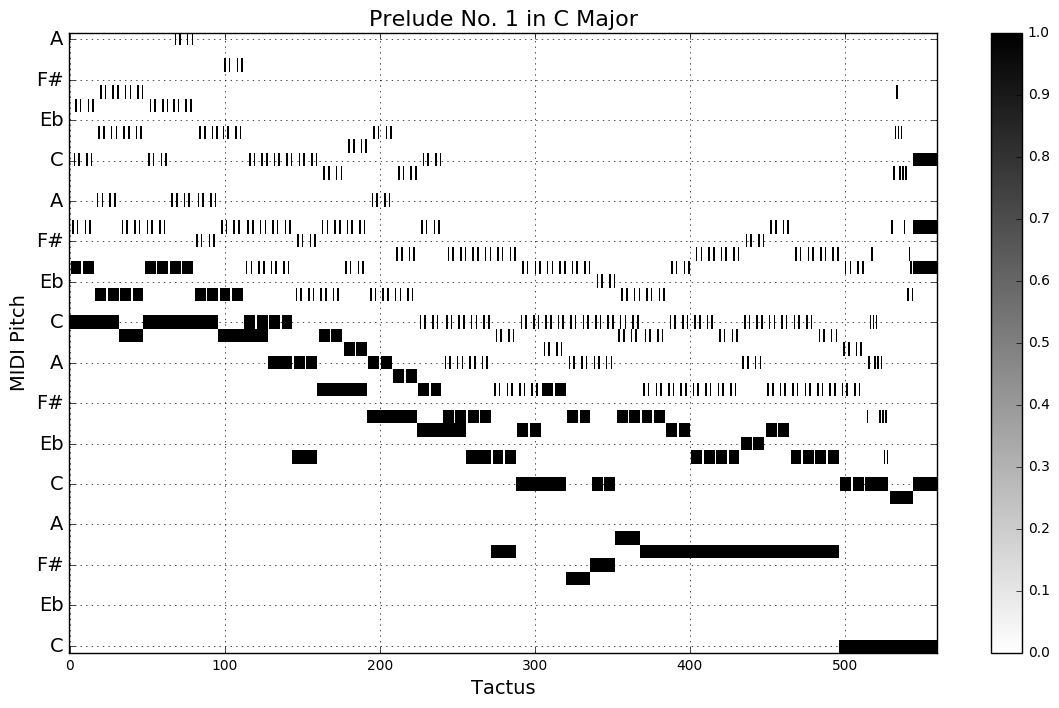

In [6]:
ton.plot_mtx(prelude1, 'Prelude No. 1 in C Major') 

<h2>Dissonance Overlay Plot</h2>

tonality.py:131: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if amps == None: amps = [1]*len(freqs)


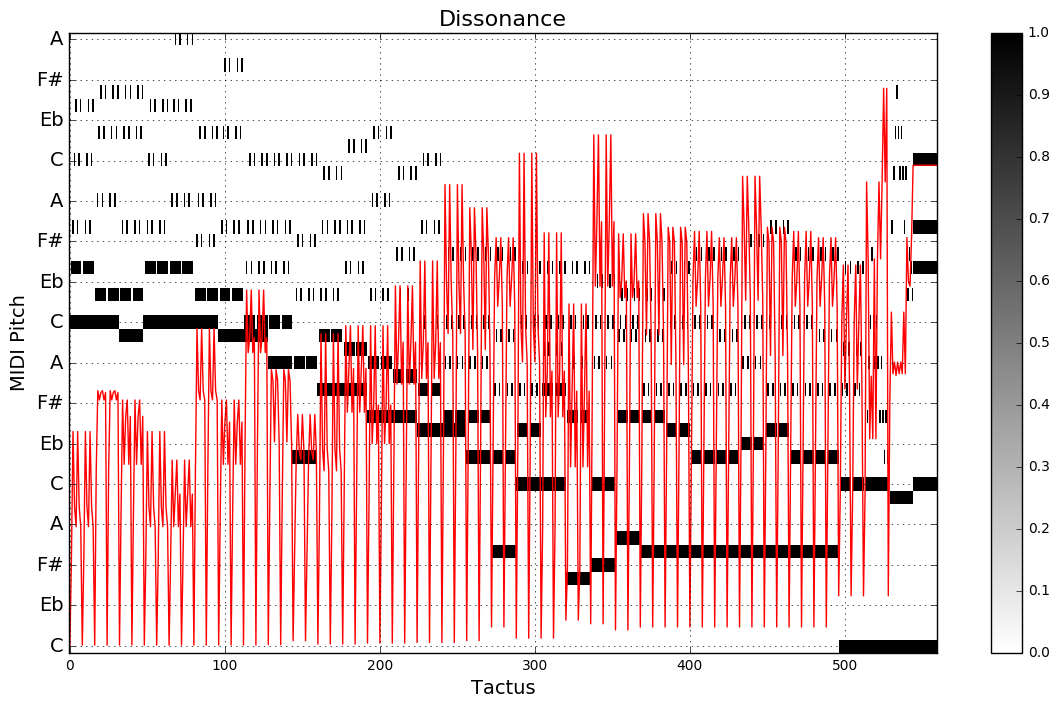

In [7]:
# Overlay dissonance plot, scaled to range of pitch values
ton.plot_mtx(prelude1, 'Prelude No. 1 in C Major') 
d = ton.dissonance_fun(prelude1)
plot(d*30,'r')
title('Dissonance',fontsize=16)
ax = axis('tight')

<h2>Pitch Usage Histogram</h2>

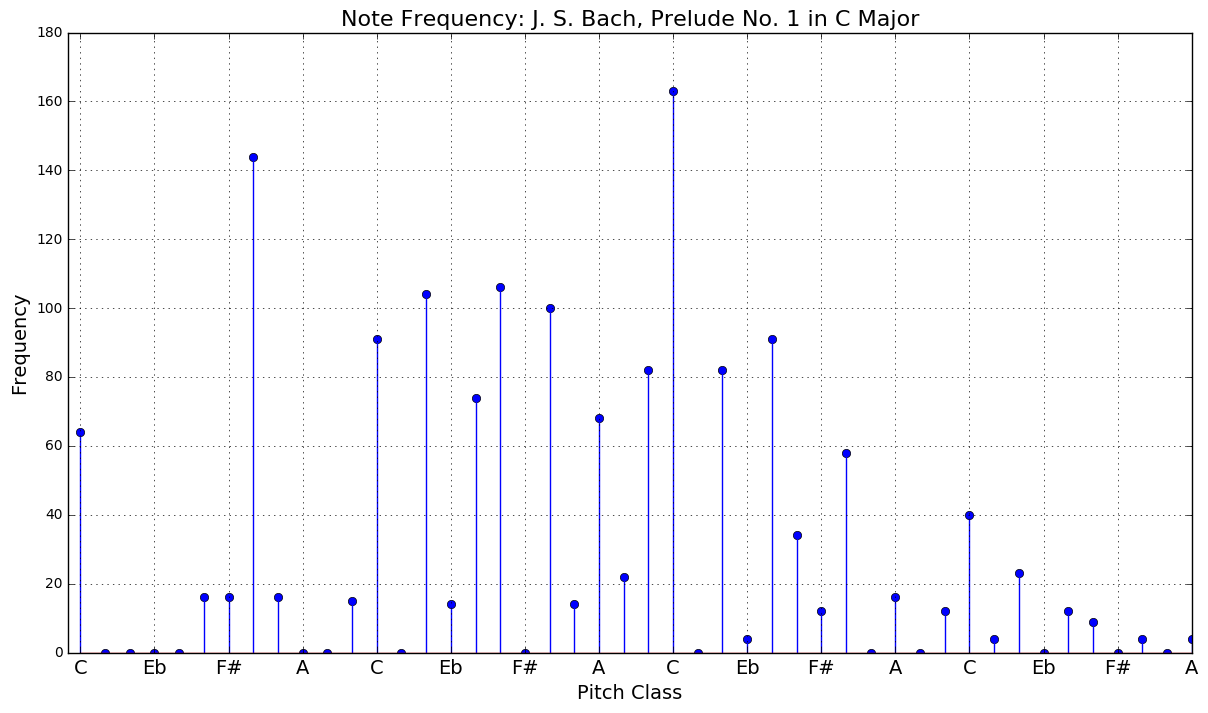

In [8]:
# Summarize the work as a histogram, showing only range of active pitches
ton.hist_mtx(prelude1, 'J. S. Bach, Prelude No. 1 in C Major')

<h2>Dissimilarity Matrix</h2>

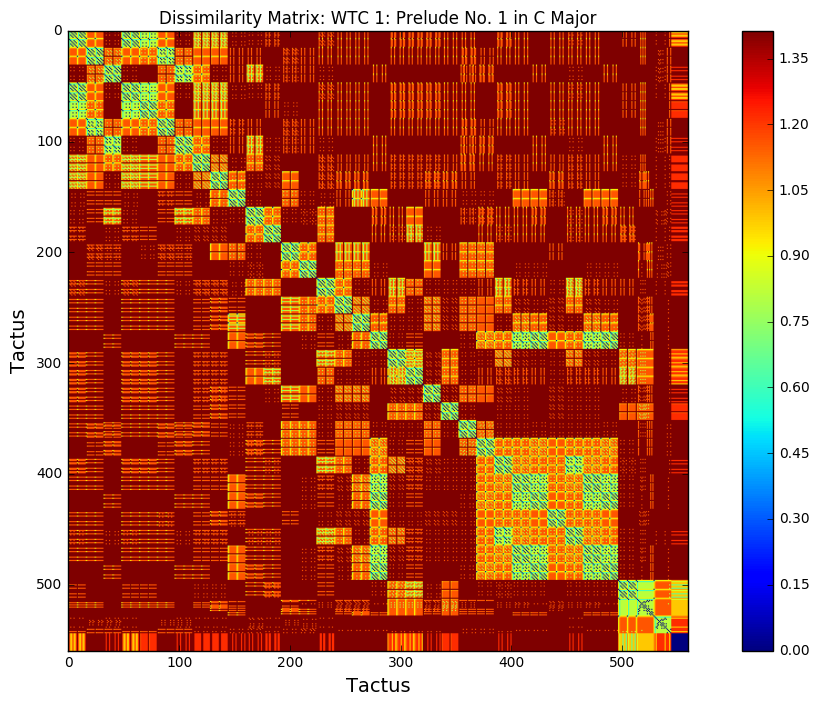

In [9]:
D = ton.dissimilarity_mtx(prelude1)
imshow(D)
colorbar()
title('Dissimilarity Matrix: WTC 1: Prelude No. 1 in C Major')
xlabel('Tactus', fontsize=14); ylabel('Tactus', fontsize=14)

<h1>Part B: Working with a Corpus</h1>
<h4>So far we have considered only one work at a time. Here we will investigate working with a corpus of works: the Well Tempered Clavier (WTC) Books 1 and 2 by J. S. Bach</h4>
<h4>WTC is organized into two books with 48 works each: a prelude and a fugue for every major and minor key in pitch class order: ['C','C#','D',...].</h4>
<h4>The WTC folder contains MIDI piano roll matrix representations of each work.</h4>

<h4>BOOK 1:</h4>
<ul>
<li>1.ascii = Prelude No. 1 in C Major
<li>2.ascii = Fugue No. 1 in C Major
<li>3.ascii = Prelude No. 2 in C Minor
<li>4.ascii = Fugue No. 2 in C Minor
<li>5.ascii = Prelude No. 3 in C# Major
<li>6.ascii = Fugue No. 3 in C# Major
<li>7.ascii = Prelude No. 4 in C# Minor
<li>8.ascii = Fugue No. 4 in C# Minor
<li>...
<li>47.ascii - Prelude No. 24 in B Minor
<li>48.ascii = Fugue No. 24 in B Minor
</ul>
<h4>BOOK 2:</h4>
<ul>
<li>49.ascii = Prelude No. 25 in C Major
<li>59.ascii = Fugue No. 25 in C Major
<li>...
<li>95.ascii = Prelude No. 48 in B Minor
<li>96.ascii = Fugue No. 48 in B Minor
</ul>




<h2>Loading and Displaying Multiple Works</h2>

In [10]:
# Learn about the load_wtc function
help(ton.load_wtc)

Help on function load_wtc in module tonality:

load_wtc(idx=None, win_len=1, sample_len=0)
    Load scores in matrix form in the entire WTC dataset.
    Inputs:
            idx - slice argument giving range of works [None] (all)
        win_len - num tactus beats to integrate [1] (no integration)
     sample_len - number of sampled windows per work [0] (all)



tonality.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  aa.append(a[:,k*win_len:(k+1)*win_len].mean(1))


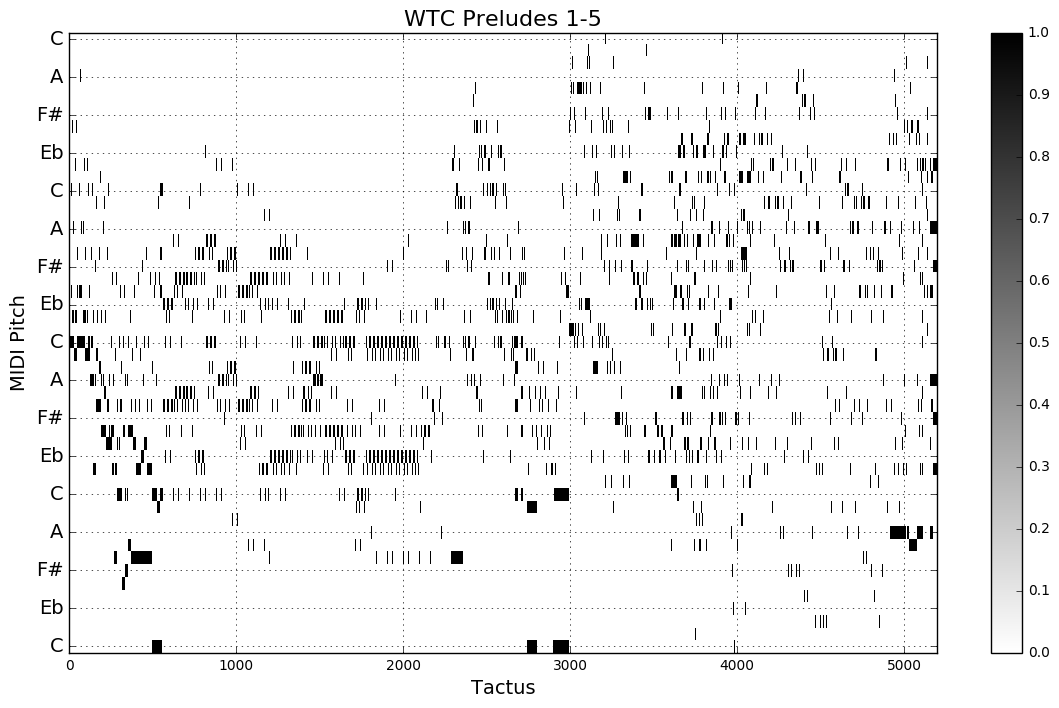

In [11]:
# Load the first two works in WTC
A = ton.load_wtc(slice(0,10,2)) # sample_len=0
A = hstack(A) # Stack (concatenate) the two works into a single matrix
ton.plot_mtx(A, 'WTC Preludes 1-5')


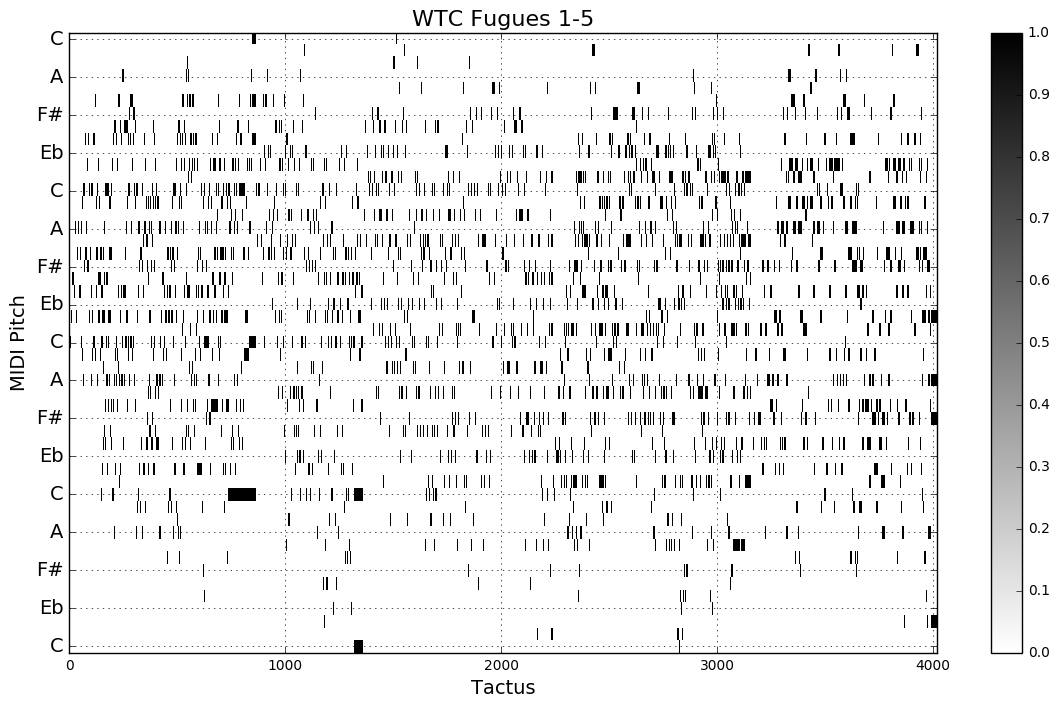

In [12]:
# Load the first five Fugues in WTC
A = ton.load_wtc(slice(1,10,2)) # sample_len=0
A = hstack(A) # Stack (concatenate) the works into a single matrix
ton.plot_mtx(A, 'WTC Fugues 1-5')


Matrix Size is: (128, 21671)


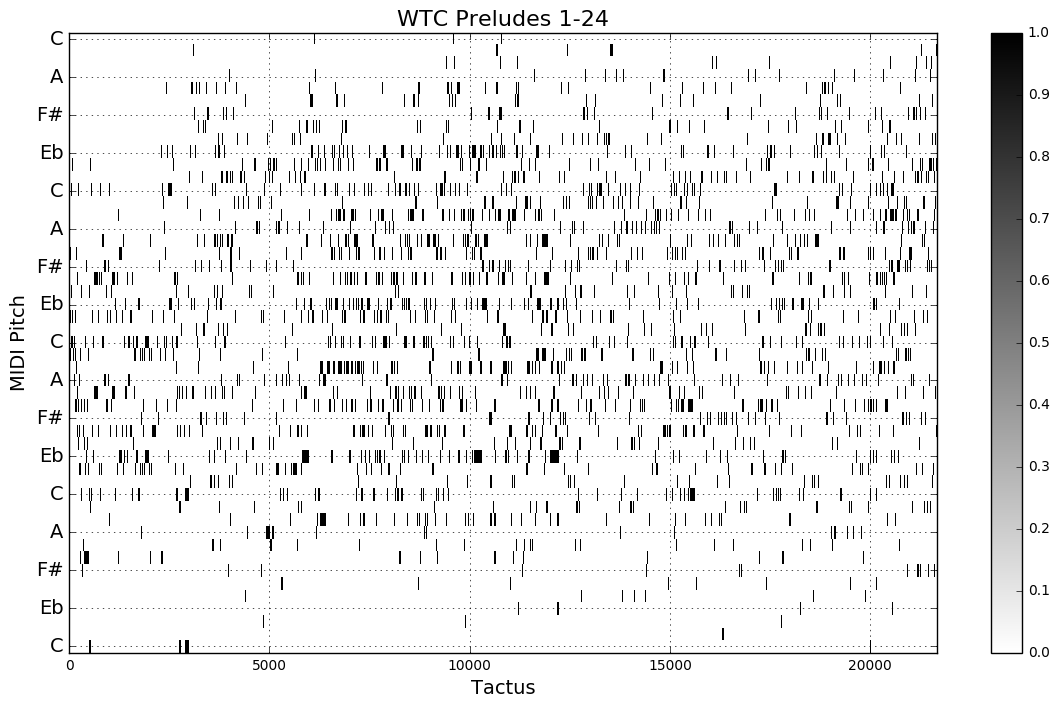

In [13]:
# Load the 24 Preludes in WTC Book 1
A = ton.load_wtc(slice(0,48,2)) # sample_len=0
A = hstack(A) # Stack (concatenate) the two works into a single matrix
#A = ton.scale_mtx(A.T, norm=True).T
ton.plot_mtx(A, 'WTC Preludes 1-24')
print "Matrix Size is:", A.shape

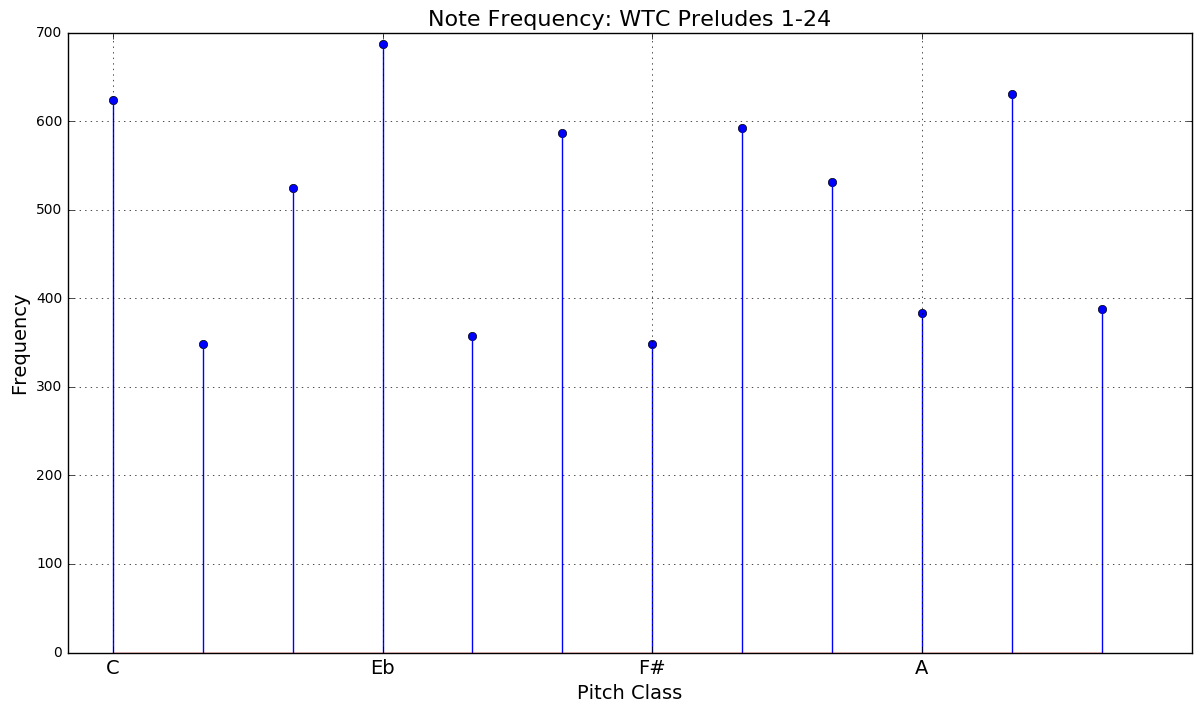

In [14]:
# Make a plot of pitch usage in all Preludes in book 1
ton.hist_mtx(ton.fold_mtx(A), 'WTC Preludes 1-24')

<h2>QUESTION: What do you conclude about pitch usage in Preludes 1-24 in Book 1 of WTC?</h2>

WRITE YOUR ANSWER HERE

<h1>Finding Implicit Geometry in Tonality</h1>

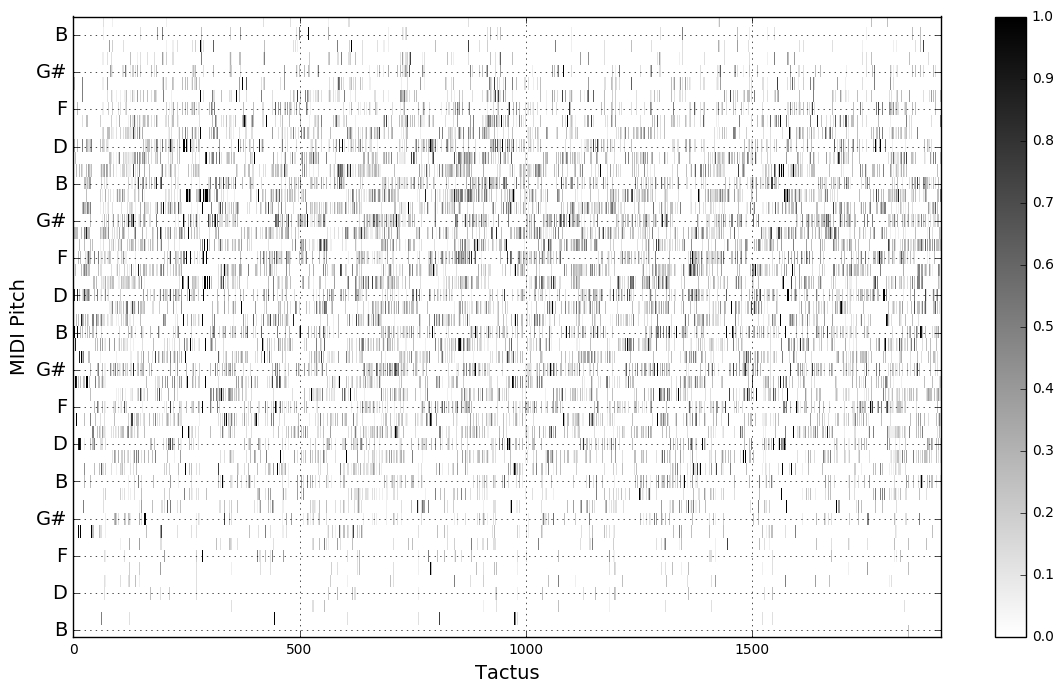

In [15]:
# Loading whole works results in very large matrices.
# We need to restrict the size of matrices to have <=5000 time points
# We have two choices:
#  1) Average Adjacent Tactus into pitch profiles spanning Beats, Bars or Phrases
#  2) Randomly sample subsets of Beats, Bars, or Phrases in each work
A = ton.load_wtc(win_len=16, sample_len=20) # Integrate 16 adjacent frames into beat-level
A = hstack(A) # Stack (concatenate) the two works into a single matrix
ton.plot_mtx(A)


<h2>Making a Corpus-Level Dissimilarity Matrix</h2>

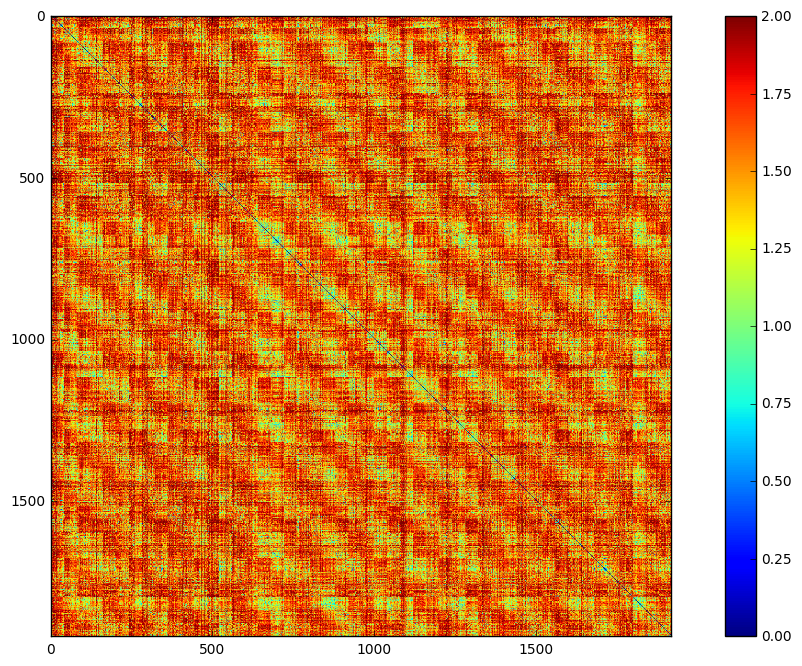

In [16]:
# Now that we have fewer time-points due to integration, we can form the pair-wise dissimilarity matrix
D = ton.dissimilarity_mtx(A)
imshow(D**2)
colorbar()

<h1>Eigen Pitches</h1>
<h2>Principal Component Analysis (PCA) using the Singular Value Decomposition (SVD)</h2>

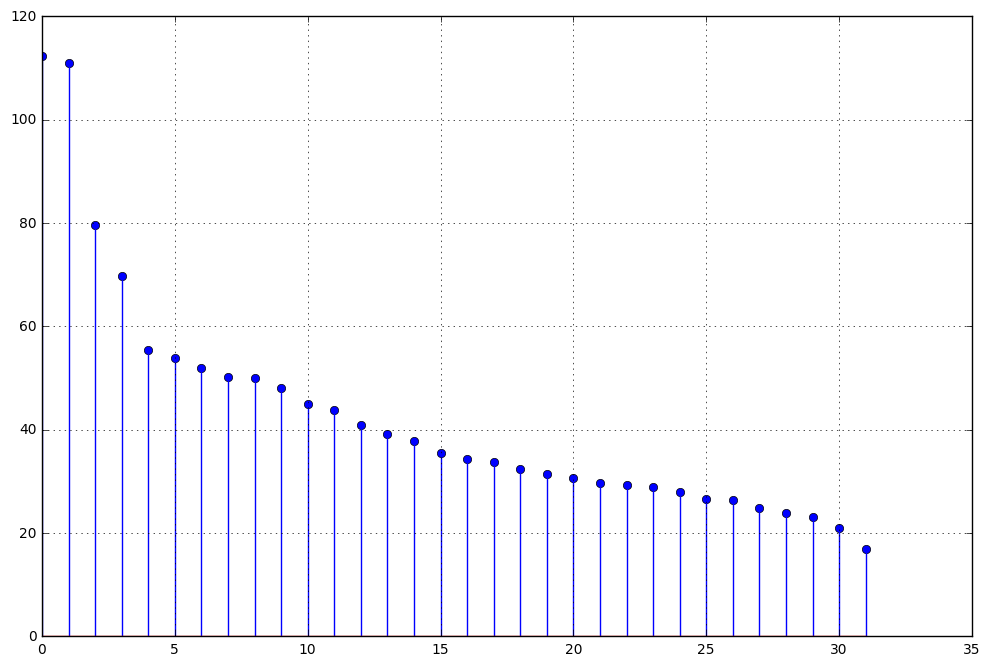

In [17]:
# Center the Dissimilarity Matrix
B = ton.center_mtx(D**2) # Use squared dissimilarity

# Singular Value Decomposition (Eigenvector Analysis)
u,s,v = svd(B) # 
figure(figsize=(12,8))
stem(arange(32),s[:32])
grid()

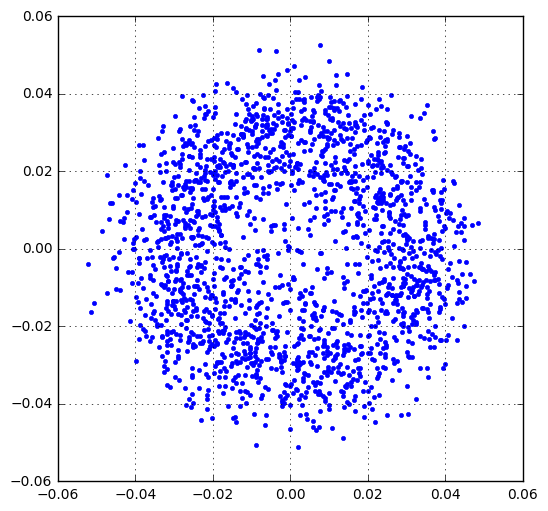

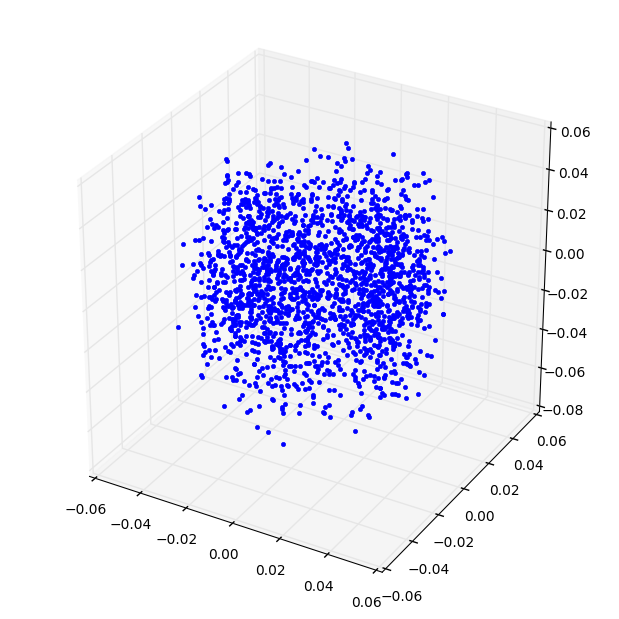

In [18]:
# Now make a plot of each 'beat' projected onto the first two eigenvector dimensions
figure(figsize=(6,6))
plot(u[:,0], u[:,1],'.')
grid()
figure(figsize=(6,6))
plot3(u[:,0],u[:,1],u[:,2], linestyle='', marker='.')

In [19]:
mylab.points3d(u[:,0], u[:,1], u[:,2], color=(.5,1,.5), scale_factor=.1)
mylab.show()

<h2>QUESTION: What do you see. What do you think this represents ?</h2>

In [20]:
sys.path.append('/home/mkc/exp/tsne_python')

In [21]:
import tsne

In [22]:
tsne.tsne?

In [23]:
p = tsne.tsne(A.T, no_dims=3, perplexity=5)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  1918 ...
Computing P-values for point  500  of  1918 ...
Computing P-values for point  1000  of  1918 ...
Computing P-values for point  1500  of  1918 ...
Mean value of sigma:  0.209178784402
Iteration  10 : error is  26.4542414369
Iteration  20 : error is  25.1614123521
Iteration  30 : error is  23.1504069892
Iteration  40 : error is  22.7349659756
Iteration  50 : error is  22.8526930357
Iteration  60 : error is  22.9815380658
Iteration  70 : error is  23.0227838535
Iteration  80 : error is  23.003862655
Iteration  90 : error is  22.9597626334
Iteration  100 : error is  22.9230024689
Iteration  110 : error is  3.66247149031
Iteration  120 : error is  2.99032651986
Iteration  130 : error is  2.63713554445
Iteration  140 : error is  2.42455160831
Iteration  150 : error is  2.28321238072
Iteration  160 : error is  2.18330612693
Iteration  170 : error is  2.11146174279
Iteration  180 :

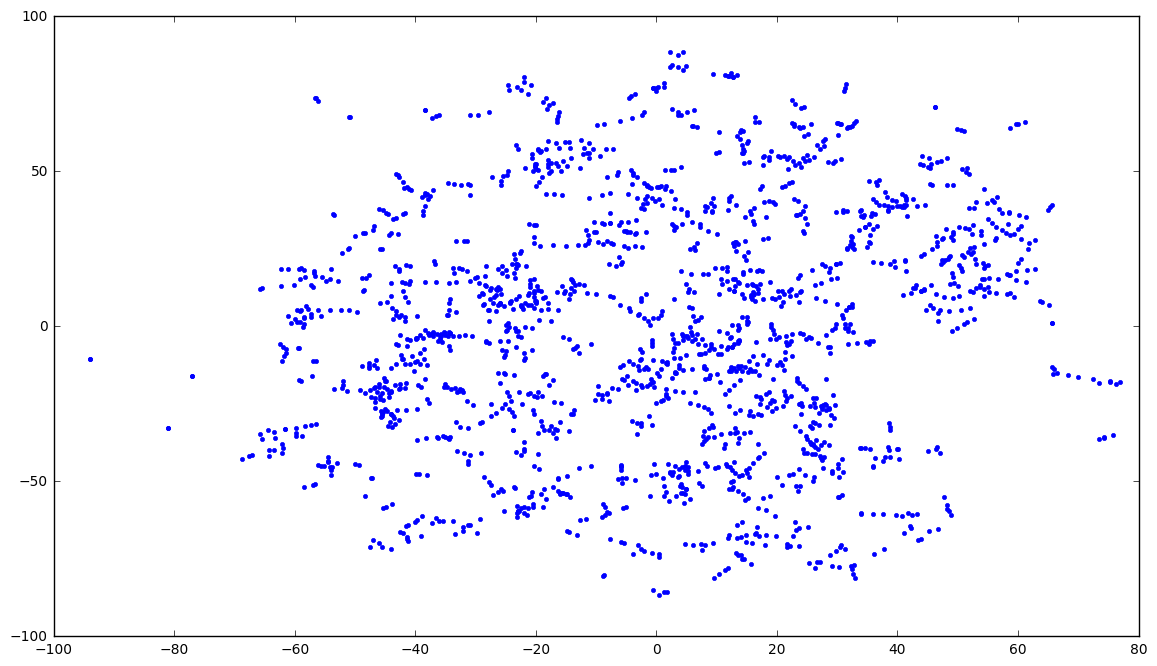

In [24]:
plot(p[:,0],p[:,1],'.')

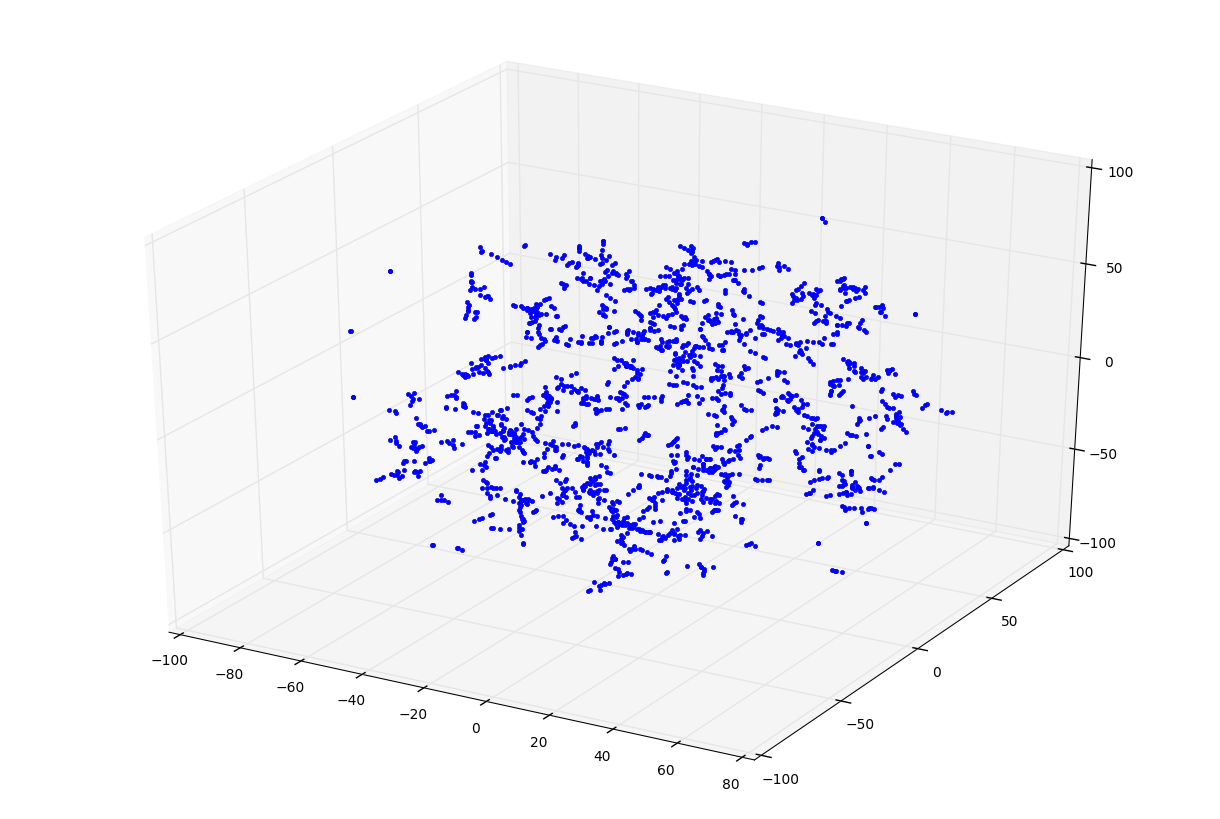

In [25]:
figure(figsize=(12,8))
ax = plot3(p, linestyle='', marker='.')


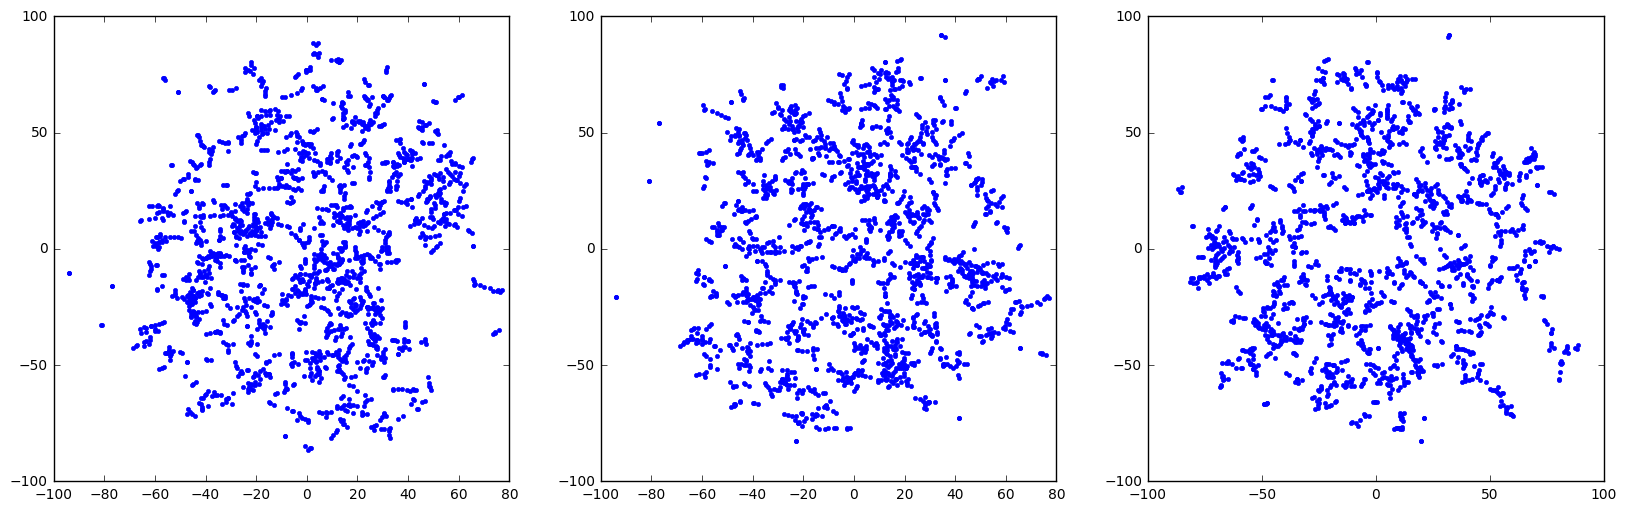

In [27]:
figure(figsize=(20,6))
subplot(131)
plot(p[:,0],p[:,1],'.')
subplot(132)
plot(p[:,0],p[:,2],'.')
subplot(133)
plot(p[:,1],p[:,2],'.')

In [28]:
# Interactive 3D plot (would be great to make this interactive audio-visual)

In [33]:
mylab.points3d(p[:,0], p[:,1], p[:,2], color=(0,1,1), scale_factor=2.5)
mylab.show()

TraitError: The 'source' trait of a ProbeFilter instance is 'read only'.

In [118]:
A.shape

(128, 1918)

In [32]:
mylab.points3d?